## Importing Packages

In [7]:
import pandas as pd
import numpy as np
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import re
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
# Download necessary NLTK data
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')
from sklearn.model_selection import train_test_split

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/mahjabeenmohiuddin/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/mahjabeenmohiuddin/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/mahjabeenmohiuddin/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/mahjabeenmohiuddin/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


## Loading Dataset

In [8]:
sms_df = pd.read_csv("/Volumes/DriveB/NLP_Learning/sms_spam_dataset/spam_or_ham.csv")
sms_df

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ã_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


## Assigning new names of columns

In [9]:
sms_df = sms_df.rename(columns = {'v1':'label', 'v2':'message'})
sms_df

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ã_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


## Assessing Nan values count in each column

In [11]:
sms_df.isna().sum()

label      0
message    0
dtype: int64

#### Converting text to lowercase
#### Removing punctuation
#### Removing stop words
#### Lemmatizing or stemming words
#### Removing special characters and numbers


In [12]:
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

def clean_text(text):
    text = re.sub('[^A-Za-z]', ' ', text)
    text = text.lower()
    cleaned_tokens = [lemmatizer.lemmatize(word) for word in words if word not in stop_words]
    cleaned_text = ' '.join(cleaned_tokens)
    return cleaned_text


sms_df['cleaned_message'] = sms_df['message'].apply(clean_text)

print(sms_df[['message', 'cleaned_message']].head())



                                             message  \
0  Go until jurong point, crazy.. Available only ...   
1                      Ok lar... Joking wif u oni...   
2  Free entry in 2 a wkly comp to win FA Cup fina...   
3  U dun say so early hor... U c already then say...   
4  Nah I don't think he goes to usf, he lives aro...   

                                     cleaned_message  
0  go jurong point crazy available bugis n great ...  
1                            ok lar joking wif u oni  
2  free entry wkly comp win fa cup final tkts st ...  
3                u dun say early hor u c already say  
4                nah think go usf life around though  


In [13]:
sms_df['cleaned_message']

0       go jurong point crazy available bugis n great ...
1                                 ok lar joking wif u oni
2       free entry wkly comp win fa cup final tkts st ...
3                     u dun say early hor u c already say
4                     nah think go usf life around though
                              ...                        
5567    nd time tried contact u u pound prize claim ea...
5568                            b going esplanade fr home
5569                                 pity mood suggestion
5570    guy bitching acted like interested buying some...
5571                                       rofl true name
Name: cleaned_message, Length: 5572, dtype: object

In [14]:
sms_df

,label,message,cleaned_message
0,0,"Go until jurong point, crazy.. Available only ...",go jurong point crazy available bugis n great ...
1,0,Ok lar... Joking wif u oni...,ok lar joking wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,free entry wkly comp win fa cup final tkts st ...
3,0,U dun say so early hor... U c already then say...,u dun say early hor u c already say
4,0,"Nah I don't think he goes to usf, he lives aro...",nah think go usf life around though
...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,nd time tried contact u u pound prize claim ea...
5568,0,Will Ã_ b going to esplanade fr home?,b going esplanade fr home
5569,0,"Pity, * was in mood for that. So...any other s...",pity mood suggestion
5570,0,The guy did some bitching but I acted like i'd...,guy bitching acted like interested buying some...


## Transforming X and y variables

In [15]:
vectorizor = TfidfVectorizer(stop_words="english")
X = vectorizor.fit_transform(sms_df['cleaned_message'])
y = sms_df['label']

## Splitting data into train and test sets

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Initializing MultinominalNB class and fitting the model

In [17]:
from sklearn.naive_bayes import MultinomialNB

nb_classifier = MultinomialNB()
nb_classifier.fit(X_train, y_train)

MultinomialNB()

### Evaluating Model

In [18]:
from sklearn.metrics import classification_report,accuracy_score

In [19]:
train_predict = nb_classifier.predict(X_train)
print(f"Accuracy: {accuracy_score(y_train, train_predict):.4f}")
print("\nClassification Report of training set:\n")
print(classification_report(y_train, train_predict, target_names=['Ham', 'Spam']))
      

Accuracy: 0.9782

Classification Report of training set:

              precision    recall  f1-score   support

         Ham       0.98      1.00      0.99      3860
        Spam       1.00      0.84      0.91       597

    accuracy                           0.98      4457
   macro avg       0.99      0.92      0.95      4457
weighted avg       0.98      0.98      0.98      4457



In [20]:
test_predict = nb_classifier.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test, test_predict):.4f}")
print("\nClassification Report of test set:\n")
print(classification_report(y_test, test_predict, target_names=['Ham', 'Spam']))

Accuracy: 0.9641

Classification Report of test set:

              precision    recall  f1-score   support

         Ham       0.96      1.00      0.98       965
        Spam       1.00      0.73      0.85       150

    accuracy                           0.96      1115
   macro avg       0.98      0.87      0.91      1115
weighted avg       0.97      0.96      0.96      1115



## Testing prediction with sample messages that is randomly selected fromn the dataset

In [21]:
y_test_np=y_test.to_numpy()

sample_indices = np.random.choice(X_test.shape[0], 5, replace=False)

sample_messages = X_test[sample_indices]
sample_true_labels = y_test_np[sample_indices]

sample_predictions = nb_classifier.predict(sample_messages)


## Displaying results

In [22]:
for index, (message_vector, label) in enumerate(zip(sample_messages, sample_predictions)):
    message_text = sms_df['cleaned_message'].iloc[sample_indices[index]]
    print(f"Sample {index +1} - Cleaned Message: {message_text}")
    print(f"prediction : {'Spam' if label == 1 else 'Ham'}")
    print(f"True Label: {'Spam' if sample_true_labels[index] == 1 else 'Ham'}\n")


Sample 1 - Cleaned Message: awarded sipix digital camera call landline delivery within day c box bp yr warranty ppm p p
prediction : Spam
True Label: Spam

Sample 2 - Cleaned Message: credit topped http www bubbletext com renewal pin tgxxrz
prediction : Ham
True Label: Ham

Sample 3 - Cleaned Message: hoping enjoyed game yesterday sorry touch pls know fondly bein thot great week abiola
prediction : Ham
True Label: Ham

Sample 4 - Cleaned Message: free top polyphonic tone call national rate get toppoly tune sent every week text subpoly per pole unsub
prediction : Ham
True Label: Ham

Sample 5 - Cleaned Message: long since screamed princess
prediction : Ham
True Label: Ham



## WordCloud Visualization

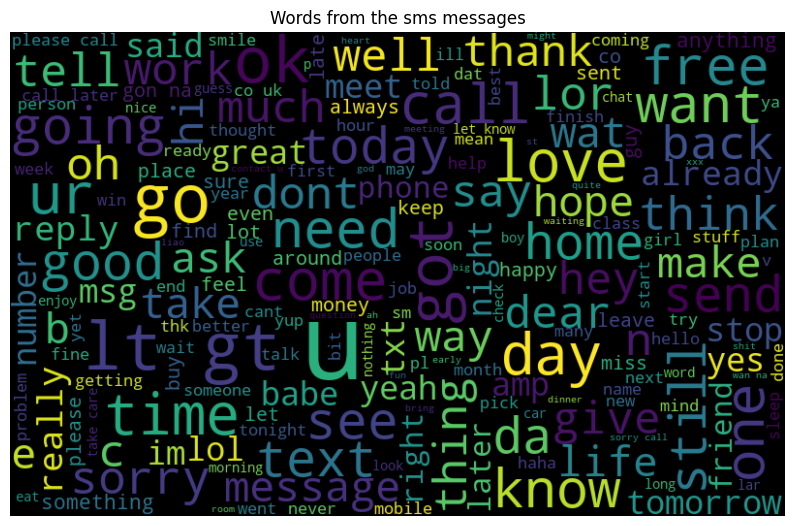

In [23]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
all_words = ' '.join([text for text in sms_df['cleaned_message']])
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.title("Words from the sms messages")
plt.axis('off')
plt.show()